# Import data

In [151]:
# data wrangling
import pandas as pd
import numpy as np

In [152]:
csv_url = 'https://raw.githubusercontent.com/Taweilo/DS_note/main/4.%20Review/Multivariate%20Analysis/Iris.csv'
df = pd.read_csv(csv_url)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [153]:
# data understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [154]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [155]:
# replace the name
# Mapping for replacement
species_mapping = {'Iris-setosa': 'setosa', 'Iris-versicolor': 'versicolor', 'Iris-virginica': 'virginica'}

# Replace the species names in the 'species' column
df['Species'] = df['Species'].replace(species_mapping)

# Print the updated DataFrame
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [156]:
df=df.drop("Id", axis=1)
df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# EAD

In [157]:
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

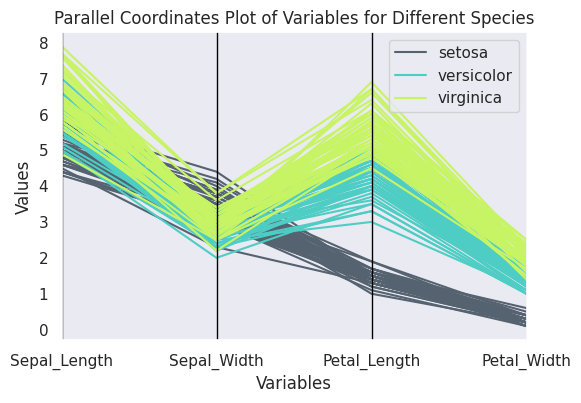

In [158]:
# Parallel coordinate plot
plt.figure(figsize=(6, 4))

# Include 'Species' column in the DataFrame
df_for_plot = df[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']]

# Use parallel_coordinates with color based on 'Species'
parallel_coordinates(df_for_plot, 'Species', color=('#556270', '#4ECDC4', '#C7F464'))

# Customize the plot
plt.title('Parallel Coordinates Plot of Variables for Different Species')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()

<Axes: >

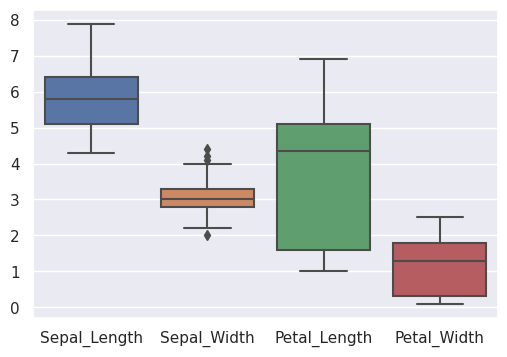

In [159]:
# Plotting a box plot

sns.set(rc={'figure.figsize':(6,4)})
sns.boxplot(data=df)

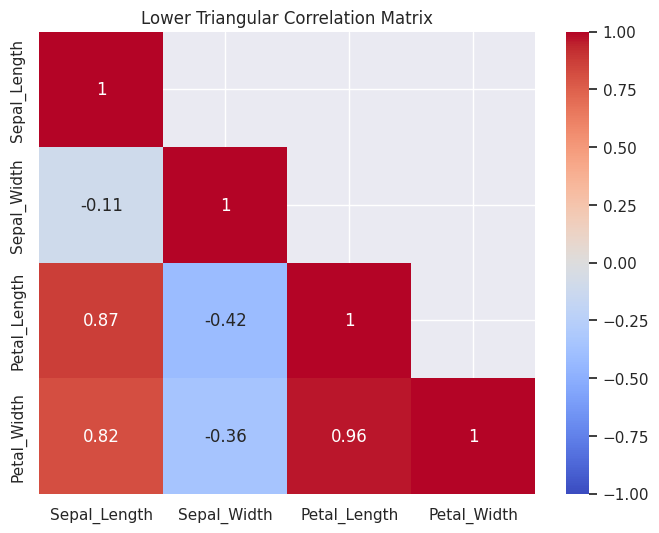

In [160]:
# Calculate the correlation matrix with numeric_only set to True
correlation_matrix = df.corr(numeric_only=True)

# Mask the upper triangular part
mask = np.triu(np.ones(correlation_matrix.shape), k=1)
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.title('Lower Triangular Correlation Matrix')
plt.show()

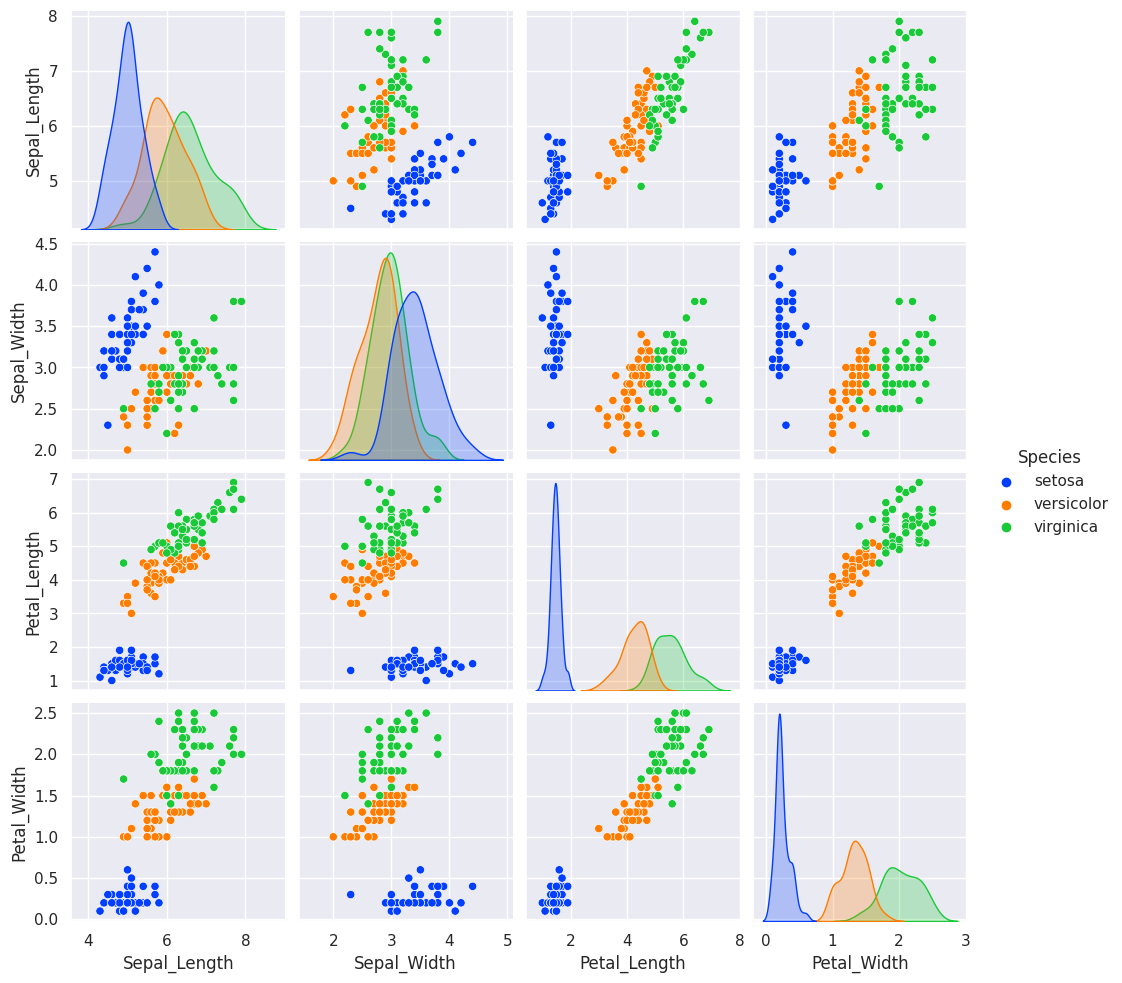

In [161]:
sns.pairplot(df, hue="Species",palette="bright")

## Statatical Testing (MNOVA)

In [162]:
from statsmodels.multivariate.manova import MANOVA
maov = MANOVA.from_formula('Sepal_Length + Sepal_Width + \
                            Petal_Length + Petal_Width  ~ Species', data=df)
print(maov.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0170 4.0000 144.0000 2080.5278 0.0000
         Pillai's trace  0.9830 4.0000 144.0000 2080.5278 0.0000
 Hotelling-Lawley trace 57.7924 4.0000 144.0000 2080.5278 0.0000
    Roy's greatest root 57.7924 4.0000 144.0000 2080.5278 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        Species          Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0235 8.0000 288.0000  198.7110 0.0000
         Pillai's trace  1.1872 8.0000 290.00

PCA

Explained Variance Ratio:
[0.72770452 0.23030523 0.03683832 0.00515193]


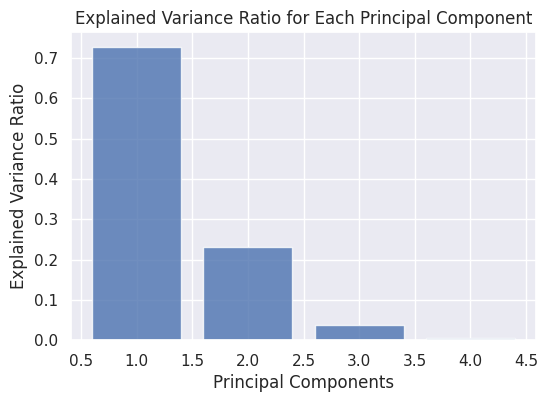

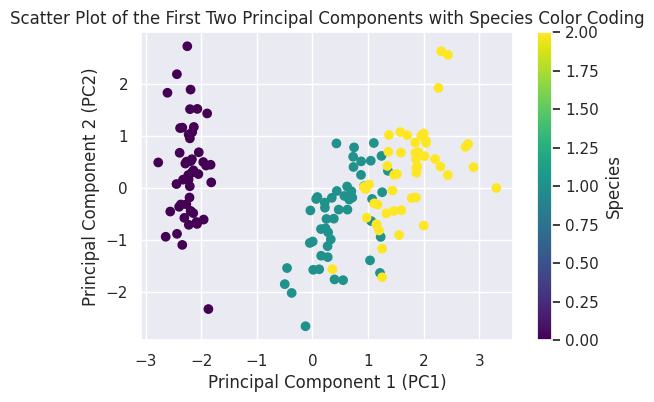

In [163]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data (important for PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']])

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4'])
# Assuming df['Species'] is a column you want to add to pca_df
combined_df = pd.concat([pca_df, df['Species']], axis=1)


# Explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Print explained variance ratio
print("Explained Variance Ratio:")
print(explained_var_ratio)

# Plot explained variance ratio
plt.bar(range(1, len(explained_var_ratio) + 1), explained_var_ratio, alpha=0.8, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

# Scatter plot of the first two principal components with different colors for each species
plt.scatter(combined_df ['PC1'], combined_df['PC2'], c=combined_df['Species'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('Scatter Plot of the First Two Principal Components with Species Color Coding')
plt.colorbar(label='Species')
plt.show()

In [164]:
df=combined_df
df.head()

,PC1,PC2,PC3,PC4,Species
0,-2.264542,0.505704,-0.121943,-0.023073,setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,setosa
2,-2.367950,-0.318477,0.051480,-0.027825,setosa
3,-2.304197,-0.575368,0.098860,0.066311,setosa
4,-2.388777,0.674767,0.021428,0.037397,setosa


# Data preparation

In [165]:
# define X and y
X = combined_df.drop('Species', axis=1)
y = combined_df['Species']

In [166]:
from sklearn.model_selection import train_test_split
SEED = 12345

# split into three dataset
# using scikit-learn to split off training data
train_X, valid_test_X, train_y, valid_test_y = train_test_split(X, y, test_size=0.4, random_state=SEED)
# split the remainder into validation data and test data
valid_X, test_X, valid_y, test_y = train_test_split(valid_test_X, valid_test_y, test_size=0.5, random_state=SEED)

In [167]:
# check X
print(train_X.shape)
print(valid_X.shape)
print(test_X.shape)

(90, 4)
(30, 4)
(30, 4)


In [168]:
# check y
print(train_y.shape)
print(valid_y.shape)
print(test_y.shape)

(90,)
(30,)
(30,)


# Unsupervised Learning


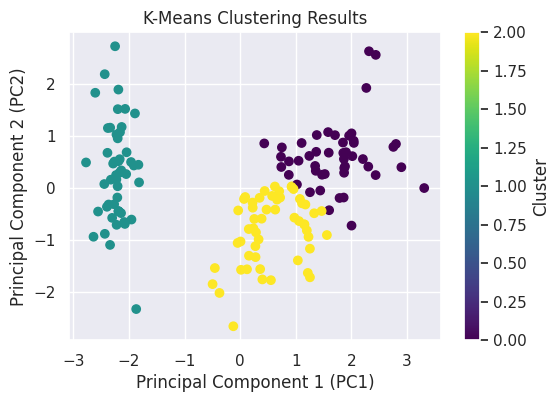

In [169]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'combined_df' is your DataFrame with numerical columns for clustering
data_for_clustering = combined_df[['PC1', 'PC2', 'PC3', 'PC4']]

# Specify the number of clusters (k)
num_clusters = 3

# Create a KMeans instance
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to your data
kmeans.fit(data_for_clustering)

# Add a 'Cluster' column to your DataFrame indicating the assigned cluster for each data point
combined_df['Cluster'] = kmeans.labels_

# Visualize the clusters in the first two principal components
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=combined_df['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('K-Means Clustering Results')
plt.colorbar(label='Cluster')
plt.show()


# Supervised learning

In [170]:
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.simplefilter("ignore")


In [171]:
# Initialize empty lists for results
models = []
hyperparameters = []
AUC = []
ACC = []

# Logistic model
models.append('Logistic Regression')
hyperparameters.append('N/A')
log_model = LogisticRegression(multi_class='ovr', random_state=42).fit(train_X, train_y)
y_pred = log_model.predict(valid_X)
y_proba_log = log_model.predict_proba(valid_X)
AUC.append(roc_auc_score(valid_y, y_proba_log, multi_class='ovr'))
ACC.append(round(accuracy_score(valid_y, y_pred), 3))

# Gaussian model
models.append('Gaussian NB')
hyperparameters.append('N/A')
G_model = GaussianNB().fit(train_X, train_y)
y_pred = G_model.predict(valid_X)
y_proba_GNB = G_model.predict_proba(valid_X)
AUC.append(roc_auc_score(valid_y, y_proba_GNB, multi_class='ovr'))
ACC.append(round(accuracy_score(valid_y, y_pred), 2))

# SVM model
models.append('SVM')
svc_params = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}
svc_grid = GridSearchCV(SVC(probability=True, decision_function_shape='ovr'), param_grid=svc_params, scoring='roc_auc', cv=5).fit(train_X, train_y)
y_pred = svc_grid.predict(valid_X)
y_proba_svm = svc_grid.predict_proba(valid_X)
hyperparameters.append('kernel: ' + svc_grid.best_params_['kernel'])
AUC.append(roc_auc_score(valid_y, y_proba_svm, multi_class='ovr'))
ACC.append(round(accuracy_score(valid_y, y_pred), 2))

# Decision Tree model
models.append('Decision Tree')
dt_params = {
    'max_depth': np.arange(1, 35, 5)
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=dt_params, scoring='roc_auc', cv=5).fit(train_X, train_y)
y_pred = dt_grid.predict(valid_X)
y_proba_dt = dt_grid.predict_proba(valid_X)
hyperparameters.append('max_depth: ' + str(dt_grid.best_params_['max_depth']))
AUC.append(roc_auc_score(valid_y, y_proba_dt, multi_class='ovr'))
ACC.append(round(accuracy_score(valid_y, y_pred), 2))

# KNN with Hyperparameter Tuning (n_neighbors)
models.append('KNN')
knn_params = {
    'n_neighbors': np.arange(1, 31)
}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, scoring='roc_auc', cv=5).fit(train_X, train_y)
y_pred = knn_grid.predict(valid_X)
y_proba_knn = knn_grid.predict_proba(valid_X)
hyperparameters.append('n_neighbors: ' + str(knn_grid.best_params_['n_neighbors']))
AUC.append(roc_auc_score(valid_y, y_proba_knn, multi_class='ovr'))
ACC.append(round(accuracy_score(valid_y, y_pred), 2))

# Random Forest with Hyperparameter Tuning
models.append('Random Forest')
rf_params = {
    'n_estimators': np.arange(50, 250, 50),
    'max_depth': np.arange(0, 55, 5),
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
}
rf_grid = RandomizedSearchCV(RandomForestClassifier(),
                param_distributions=rf_params, n_iter=100,
                cv=5, verbose=2, random_state=42, n_jobs=-1).fit(train_X, train_y)
y_pred = rf_grid.predict(valid_X)
y_proba_rf = rf_grid.predict_proba(valid_X)
hyperparameters.append('n_estimators: ' + str(rf_grid.best_params_['n_estimators']))
AUC.append(roc_auc_score(valid_y, y_proba_rf , multi_class='ovr'))
ACC.append(round(accuracy_score(valid_y, y_pred), 2))

# Create a summary DataFrame
df_summary = pd.DataFrame({
    'Model': models,
    'Hyperparameters': hyperparameters,
    'AUC under ovr': AUC,
    'Accuracy test': ACC
})

# Print table
display(df_summary.sort_values(by=[ 'Accuracy test'], ascending=False))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


,Model,Hyperparameters,AUC under ovr,Accuracy test
2,SVM,kernel: linear,1.000000,0.97
5,Random Forest,n_estimators: 50,0.970395,0.97
1,Gaussian NB,N/A,0.993022,0.93
4,KNN,n_neighbors: 1,0.947667,0.93
0,Logistic Regression,N/A,0.971790,0.90
3,Decision Tree,max_depth: 1,0.846491,0.73


In [172]:
y_pred = svc_grid.predict(test_X)
y_proba_svm = svc_grid.predict_proba(test_X)

# Print accuracy score
print(accuracy_score(test_y, y_pred))

1.0


In [173]:
from sklearn.metrics import classification_report
# Print accuracy score
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



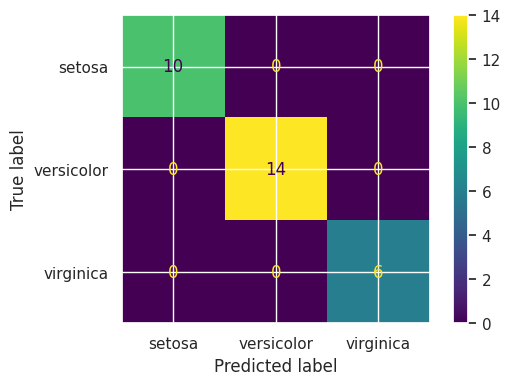

In [174]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(test_y, y_pred, labels=svc_grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_grid.classes_)
disp.plot()
plt.show()